In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('Data.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


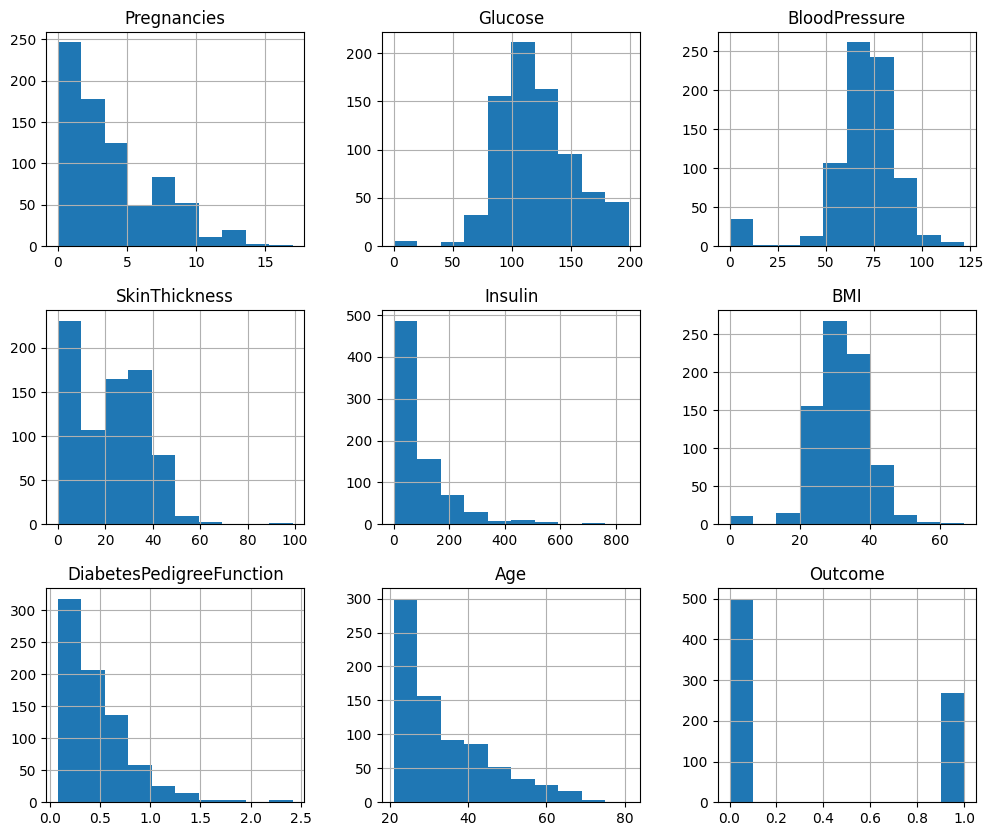

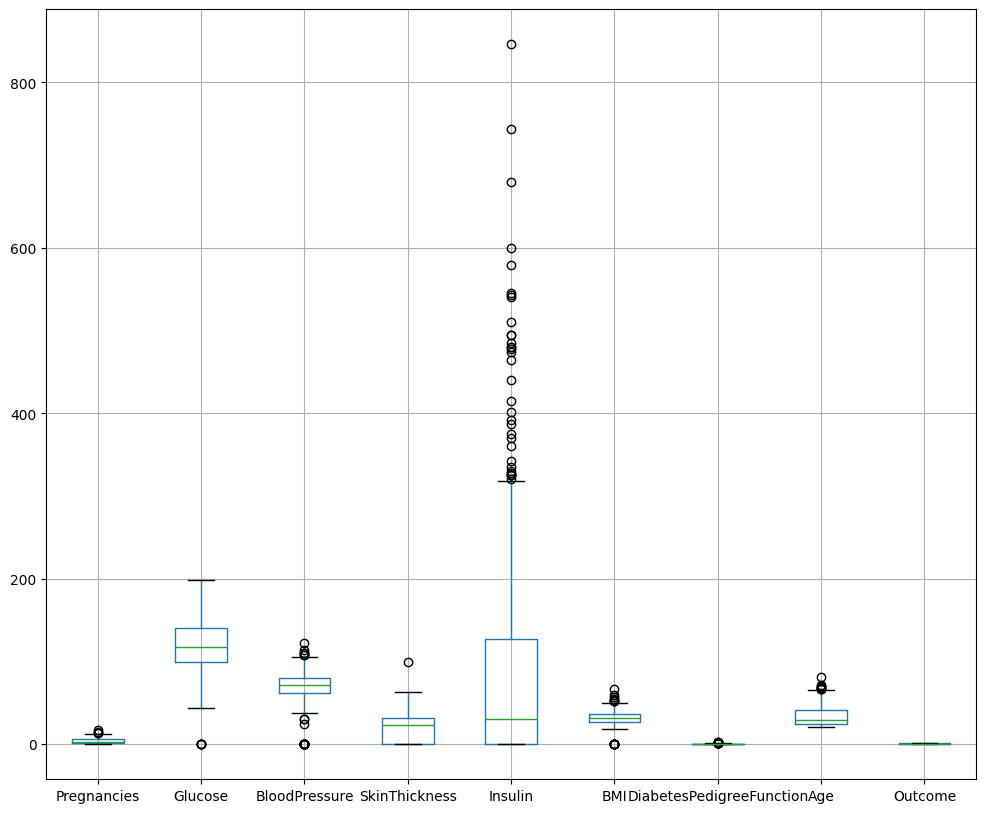

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for each numerical feature
data.hist(figsize=(12, 10))
plt.show()

# Box plot for each numerical feature
data.boxplot(figsize=(12, 10))
plt.show()


# You can also use seaborn for more visually appealing plots
# sns.boxplot(data=data)
# plt.show()
# sns.histplot(data=data, x='feature_name') # Replace 'feature_name' with the actual column name
# plt.show()


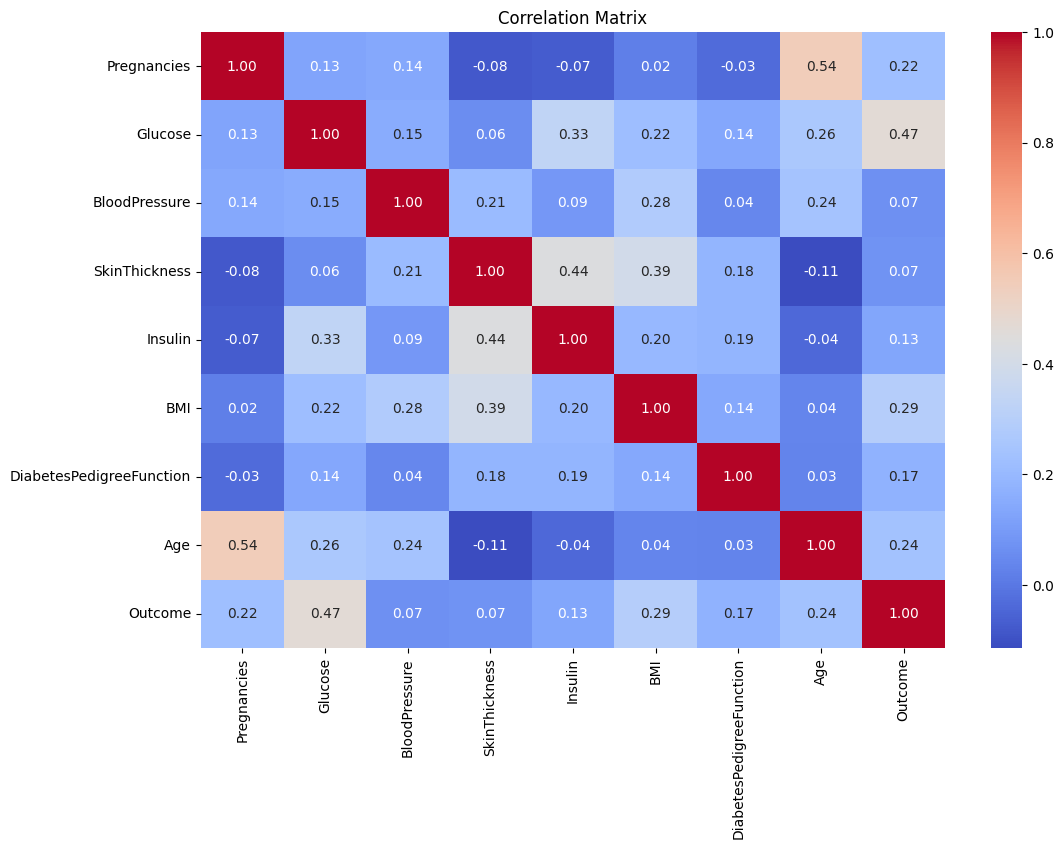

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


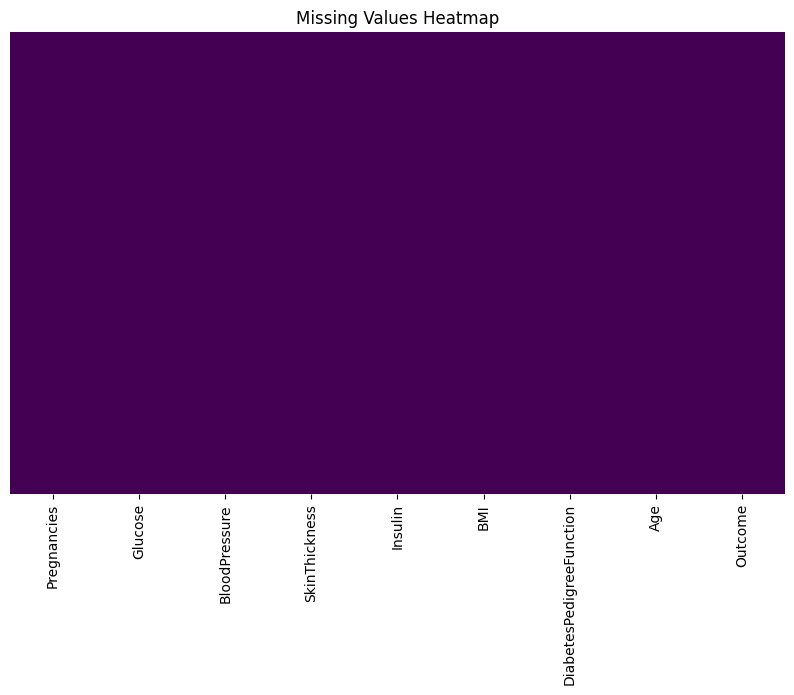

In [8]:
# Check for missing values in the DataFrame
missing_values = data.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

# You can also visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [9]:
# Find columns with zero values
zero_values = (data == 0).sum()
print(zero_values)

# You can filter columns with a significant number of zeros
columns_with_many_zeros = zero_values[zero_values > len(data) * 0.1]  # Adjust the threshold as needed
columns_with_many_zeros

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


,0
Pregnancies,111
SkinThickness,227
Insulin,374
Outcome,500


In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
# Replace zero values with the median for specified columns
for column in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
  median_value = data[column].median()
  data[column] = data[column].replace(0, median_value)

In [12]:
# Find columns with zero values
zero_values = (data == 0).sum()
print(zero_values)

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [13]:
import numpy as np

# Calculate Z-scores for numerical features
for column in data.select_dtypes(include=np.number).columns:
  data[column + '_zscore'] = (data[column] - data[column].mean()) / data[column].std()

# Identify outliers based on Z-score threshold (e.g., |Z-score| > 3)
outliers = data[(np.abs(data.filter(regex='_zscore$')) > 3).any(axis=1)]

# Print or analyze the identified outliers
print("Outliers based on Z-scores:")
outliers.count()

# You can also remove the outliers if needed
# data_cleaned = data[(np.abs(data.filter(regex='_zscore$')) <= 3).all(axis=1)]

Outliers based on Z-scores:


,0
Pregnancies,49
Glucose,49
BloodPressure,49
SkinThickness,49
Insulin,49
BMI,49
DiabetesPedigreeFunction,49
Age,49
Outcome,49
Pregnancies_zscore,49


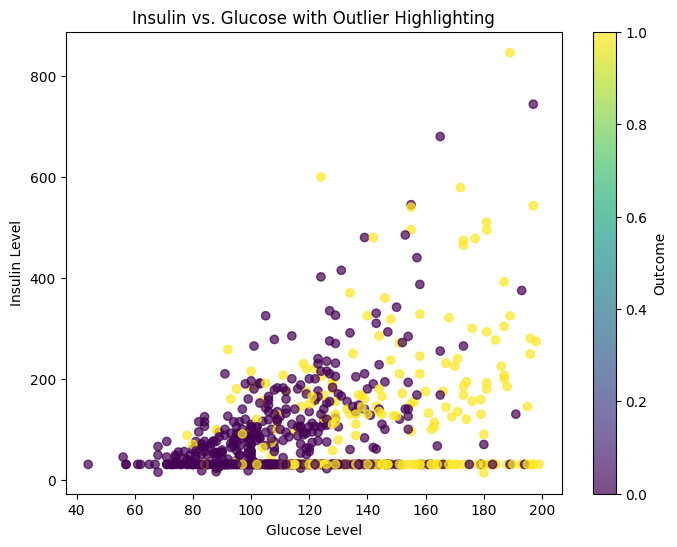

In [14]:
# @title Insulin vs. Glucose with Outlier Highlighting

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(data['Glucose'], data['Insulin'], c=data['Outcome'], cmap='viridis', alpha=0.7)
plt.title('Insulin vs. Glucose with Outlier Highlighting')
plt.xlabel('Glucose Level')
plt.ylabel('Insulin Level')
_ = plt.colorbar(label='Outcome')


In [15]:
 data_cleaned = data[(np.abs(data.filter(regex='_zscore$')) <= 3).all(axis=1)]

In [57]:
data_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_zscore,Glucose_zscore,BloodPressure_zscore,SkinThickness_zscore,Insulin_zscore,BMI_zscore,DiabetesPedigreeFunction_zscore,Age_zscore,Outcome_zscore
0,6,148,72,35,30.5,33.6,0.627,50,1,0.529050,0.865481,-0.031969,0.830572,-0.607805,0.167131,0.468187,1.425067,1.365006
1,1,85,66,29,30.5,26.6,0.351,31,0,-1.148532,-1.204281,-0.527975,0.180449,-0.607805,-0.850996,-0.364823,-0.190548,-0.731643
2,8,183,64,23,30.5,23.3,0.672,32,1,1.200082,2.015348,-0.693310,-0.469675,-0.607805,-1.330971,0.604004,-0.105515,1.365006
3,1,89,66,23,94.0,28.1,0.167,21,0,-1.148532,-1.072868,-0.527975,-0.469675,-0.006181,-0.632826,-0.920163,-1.040871,-0.731643
5,5,116,74,23,30.5,25.6,0.201,30,0,0.193533,-0.185827,0.133366,-0.469675,-0.607805,-0.996443,-0.817546,-0.275580,-0.731643


In [16]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_zscore,Glucose_zscore,BloodPressure_zscore,SkinThickness_zscore,Insulin_zscore,BMI_zscore,DiabetesPedigreeFunction_zscore,Age_zscore,Outcome_zscore
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958,1.063964e-16,-1.387779e-17,-4.625929e-18,-1.434038e-16,4.625929e-17,4.718448e-16,2.359224e-16,2.104798e-16,1.156482e-16
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,-1.085100e+00,-2.551269e+00,-4.000013e+00,-2.203338e+00,-7.641324e-01,-2.072749e+00,-1.188778e+00,-1.040871e+00,-7.316434e-01
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000,-7.541400e-01,-7.196939e-01,-6.933097e-01,-4.696748e-01,-6.078049e-01,-7.200942e-01,-6.885198e-01,-7.857741e-01,-7.316434e-01
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000,-4.231803e-01,-1.529735e-01,-3.196910e-02,-4.696748e-01,-6.006991e-01,-6.558363e-02,-2.999328e-01,-3.606124e-01,-7.316434e-01
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,5.696989e-01,6.108672e-01,6.293715e-01,5.055106e-01,3.088432e-01,6.034716e-01,4.659233e-01,6.597757e-01,1.365006e+00
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,4.210256e+00,2.541002e+00,4.101409e+00,7.765224e+00,7.118567e+00,5.039599e+00,5.879733e+00,4.061069e+00,1.365006e+00


In [17]:
data_ready = data_cleaned[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

In [21]:
from sklearn.preprocessing import StandardScaler

# Assuming 'data_ready' is your DataFrame with numerical features
X = data_ready.drop('Outcome', axis=1)  # Features
y = data_ready['Outcome']  # Target variable

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the features and transform them
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Now X_scaled_df contains your standardized features, ready for use in your model

In [62]:
data_ready.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.00000,719.000000,719.000000
mean,4.397775,120.015299,72.271210,26.877608,83.235744,32.133519,0.44922,32.922114,0.336579
std,2.896602,29.642974,11.327249,8.550948,77.213829,6.474938,0.28279,11.309623,0.472868
min,1.000000,44.000000,38.000000,7.000000,15.000000,18.200000,0.07800,21.000000,0.000000
25%,2.000000,99.000000,64.000000,23.000000,30.500000,27.400000,0.24200,24.000000,0.000000
50%,4.000000,115.000000,72.000000,23.000000,30.500000,32.000000,0.36200,29.000000,0.000000
75%,6.000000,138.000000,80.000000,32.000000,120.000000,36.100000,0.60000,40.000000,1.000000
max,13.000000,199.000000,108.000000,54.000000,402.000000,52.900000,1.46100,68.000000,1.000000


In [63]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_zscore,...,Outcome_zscore,Pregnancies_zscore_zscore,Glucose_zscore_zscore,BloodPressure_zscore_zscore,SkinThickness_zscore_zscore,Insulin_zscore_zscore,BMI_zscore_zscore,DiabetesPedigreeFunction_zscore_zscore,Age_zscore_zscore,Outcome_zscore_zscore
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,7.680000e+02,...,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,4.423177,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958,7.864080e-17,...,1.156482e-16,5.551115e-17,-2.312965e-18,5.782412e-18,1.619075e-17,2.544261e-17,2.775558e-17,1.387779e-17,-8.095376e-18,-1.387779e-17
std,2.980481,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,-1.148532e+00,...,-7.316434e-01,-1.148532e+00,-2.551269e+00,-4.000013e+00,-2.203338e+00,-7.641324e-01,-2.072749e+00,-1.188778e+00,-1.040871e+00,-7.316434e-01
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000,-8.130153e-01,...,-7.316434e-01,-8.130153e-01,-7.196939e-01,-6.933097e-01,-4.696748e-01,-6.078049e-01,-7.200942e-01,-6.885198e-01,-7.857741e-01,-7.316434e-01
50%,4.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000,-1.419828e-01,...,-7.316434e-01,-1.419828e-01,-1.529735e-01,-3.196910e-02,-4.696748e-01,-6.006991e-01,-6.558363e-02,-2.999328e-01,-3.606124e-01,-7.316434e-01
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,5.290497e-01,...,1.365006e+00,5.290497e-01,6.108672e-01,6.293715e-01,5.055106e-01,3.088432e-01,6.034716e-01,4.659233e-01,6.597757e-01,1.365006e+00
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,4.219729e+00,...,1.365006e+00,4.219729e+00,2.541002e+00,4.101409e+00,7.765224e+00,7.118567e+00,5.039599e+00,5.879733e+00,4.061069e+00,1.365006e+00


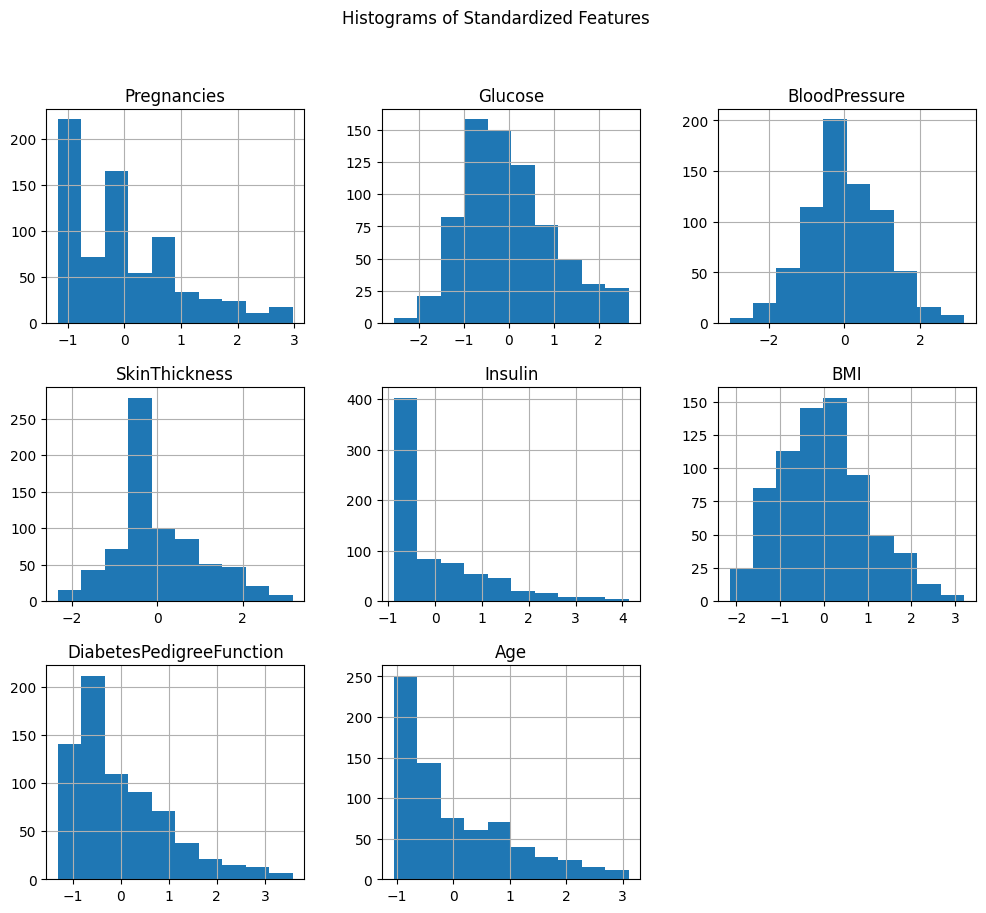

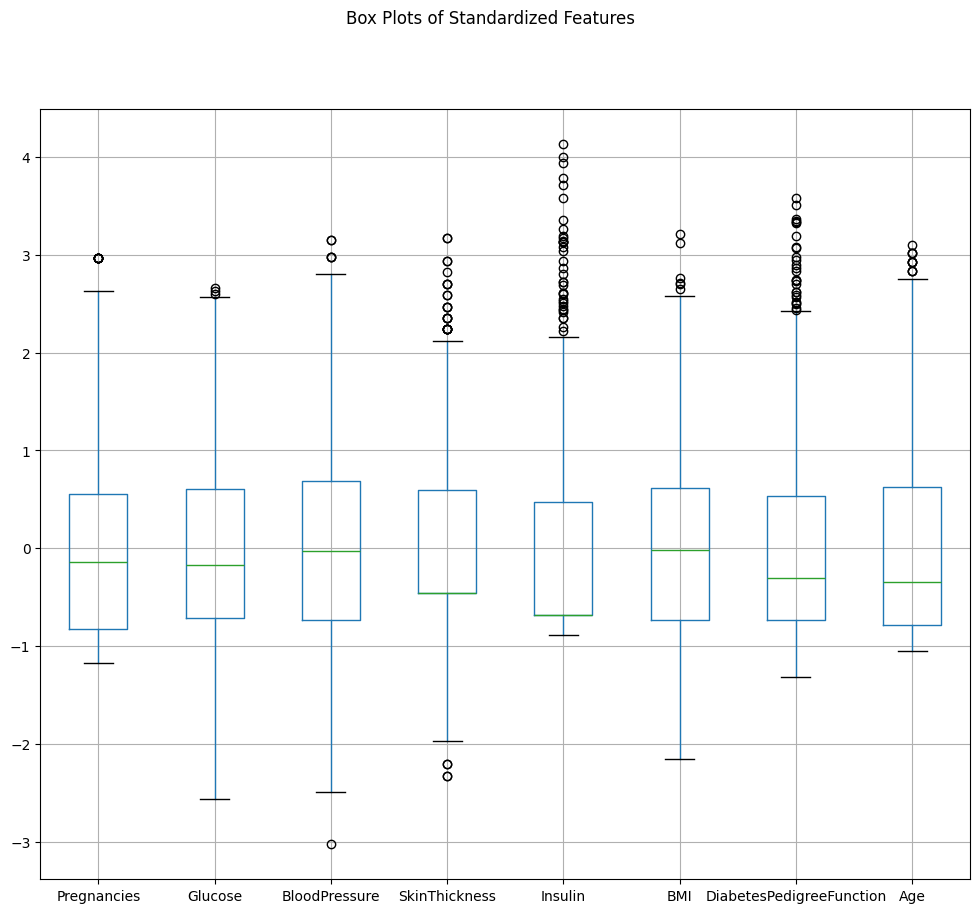

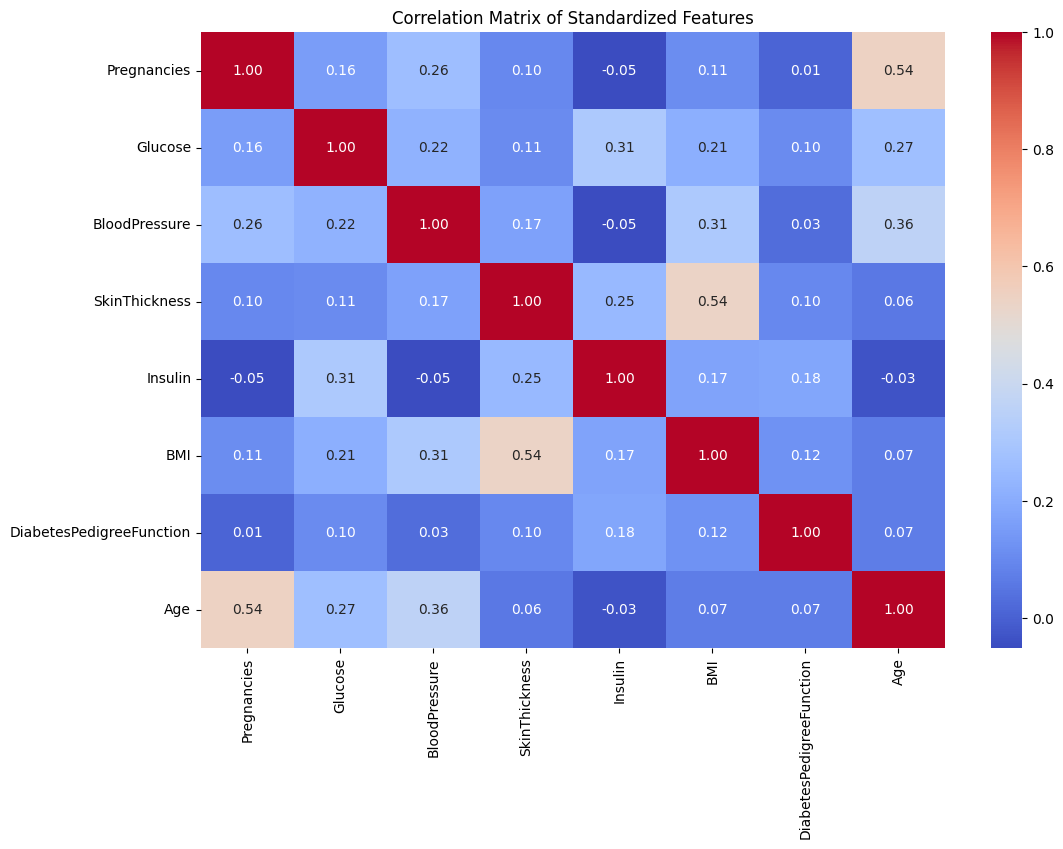

In [64]:
# Create histograms for the scaled features
X_scaled_df.hist(figsize=(12, 10))
plt.suptitle('Histograms of Standardized Features')
plt.show()


# Create box plots for the scaled features
X_scaled_df.boxplot(figsize=(12, 10))
plt.suptitle('Box Plots of Standardized Features')
plt.show()

# Calculate the correlation matrix of scaled data
correlation_matrix_scaled = X_scaled_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_scaled, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Standardized Features')
plt.show()


In [22]:
# Model Selection
# Baseline Models: Start simple before using advanced techniques.
# Logistic Regression
# Decision Trees
# Random Forest
# Gradient Boosting Models (e.g., XGBoost, LightGBM)
# Neural Networks (if you aim for deep learning).
# to data_ready

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_scaled_df and y are defined as in your previous code

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# Print results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print("-" * 20)

# You can choose the best model based on these results
# For example, you could select the model with the highest accuracy or F1-score.

Model: Logistic Regression
  Accuracy: 0.8403
  Precision: 0.6944
  Recall: 0.6757
  F1-Score: 0.6849
--------------------
Model: Decision Tree
  Accuracy: 0.6458
  Precision: 0.3833
  Recall: 0.6216
  F1-Score: 0.4742
--------------------
Model: Random Forest
  Accuracy: 0.7986
  Precision: 0.5909
  Recall: 0.7027
  F1-Score: 0.6420
--------------------
Model: XGBoost
  Accuracy: 0.7361
  Precision: 0.4902
  Recall: 0.6757
  F1-Score: 0.5682
--------------------


In [23]:
# Divide data into training and test sets (e.g., 80-20 split).
# Use stratified sampling to maintain the class distribution.
# Train initial models and evaluate with metrics like Accuracy, Precision, Recall, F1-score, and ROC-AUC.

from sklearn.metrics import roc_auc_score

# Assuming X_scaled_df and y are defined as in your previous code

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Calculate ROC-AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }

# Print results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print("-" * 20)

# You can choose the best model based on these results
# For example, you could select the model with the highest accuracy or F1-score.

Model: Logistic Regression
  Accuracy: 0.7986
  Precision: 0.7209
  Recall: 0.6458
  F1-Score: 0.6813
  ROC-AUC: 0.8481
--------------------
Model: Decision Tree
  Accuracy: 0.7431
  Precision: 0.6078
  Recall: 0.6458
  F1-Score: 0.6263
  ROC-AUC: 0.7188
--------------------
Model: Random Forest
  Accuracy: 0.7708
  Precision: 0.6744
  Recall: 0.6042
  F1-Score: 0.6374
  ROC-AUC: 0.8411
--------------------
Model: XGBoost
  Accuracy: 0.7569
  Precision: 0.6512
  Recall: 0.5833
  F1-Score: 0.6154
  ROC-AUC: 0.8160
--------------------


In [24]:
# Hyperparameter Tuning
# Use techniques like:
# Grid Search: Systematically try different parameter combinations.
# Random Search: Randomly sample hyperparameters for efficiency.
# Bayesian Optimization: Advanced tuning for larger datasets.
# Action: Apply cross-validation (e.g., 5-fold or 10-fold) to avoid overfitting.

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Example: Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1)  # Use all available cores

grid_search.fit(X_train, y_train)
print("Best parameters found by Grid Search:", grid_search.best_params_)
print("Best accuracy found by Grid Search:", grid_search.best_score_)

# Random Search
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                   param_distributions=param_grid,
                                   cv=5,
                                   scoring='accuracy',
                                   n_iter=10,  # Number of parameter settings that are sampled
                                   n_jobs=-1)

random_search.fit(X_train, y_train)
print("Best parameters found by Random Search:", random_search.best_params_)
print("Best accuracy found by Random Search:", random_search.best_score_)

# You can use the best hyperparameters found by Grid Search or Random Search to train your final model.
# For example, if 'grid_search.best_params_' is {'max_depth': 10, 'min_samples_leaf': 1, ...}
best_model = RandomForestClassifier(**grid_search.best_params_)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("Accuracy of the best model:", accuracy_best)


Best parameters found by Grid Search: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best accuracy found by Grid Search: 0.768695652173913
Best parameters found by Random Search: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Best accuracy found by Random Search: 0.7652173913043478
Accuracy of the best model: 0.7847222222222222


Confusion Matrix:
[[83 13]
 [18 30]]
True Negatives (TN): 83
False Positives (FP): 13
False Negatives (FN): 18
True Positives (TP): 30


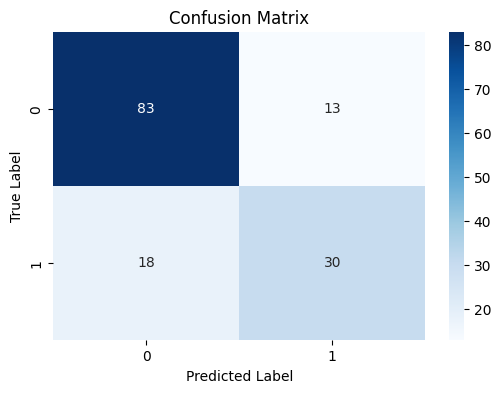

In [25]:
# Model Evaluation
# Evaluate the model on the test set using the metrics above.
# Analyze Confusion Matrix to understand errors:
# False positives (predict diabetes when absent).
# False negatives (fail to predict diabetes when present).

from sklearn.metrics import confusion_matrix

# Assuming you have already trained a model (e.g., best_model) and have y_test and y_pred_best

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Analyze the results
print("True Negatives (TN):", tn)  # Correctly predicted negative (no diabetes)
print("False Positives (FP):", fp)  # Incorrectly predicted positive (diabetes when absent)
print("False Negatives (FN):", fn)  # Incorrectly predicted negative (no diabetes when present)
print("True Positives (TP):", tp)  # Correctly predicted positive (diabetes)


# You can also visualize the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Analyze the errors:
# - False positives (FP): Model predicted diabetes, but the patient does not have diabetes.
# - False negatives (FN): Model predicted no diabetes, but the patient does have diabetes.

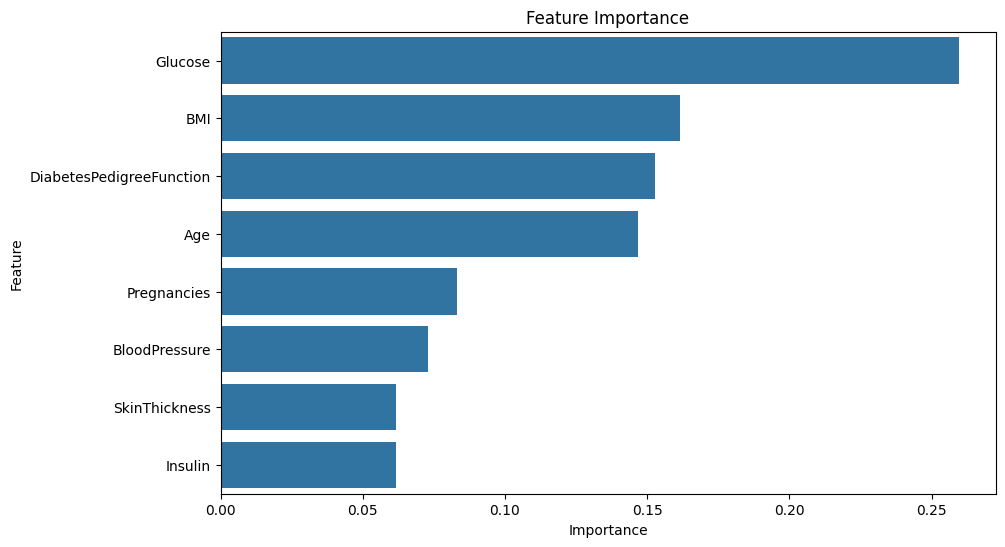

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.529027, while the model output was 0.550000. If this difference is acceptable you can set check_additivity=False to disable this check.

In [27]:
# Feature Importance
# Use feature importance tools to interpret which factors contribute most to diabetes prediction.
# Tree-based models (e.g., Random Forest, XGBoost) provide built-in feature importance.
# Use SHAP or LIME for model-agnostic explanations.

# Assuming you have a trained model (e.g., best_model from your previous code)
# and X_train is your training data DataFrame

# Feature Importance for Tree-based Models (e.g., Random Forest)
if isinstance(best_model, (RandomForestClassifier, XGBClassifier, DecisionTreeClassifier)):
  importances = best_model.feature_importances_
  feature_names = X_train.columns

  # Create a DataFrame for feature importances
  feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

  # Sort by importance in descending order
  feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

  # Plot feature importances
  plt.figure(figsize=(10, 6))
  sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
  plt.title('Feature Importance')
  plt.xlabel('Importance')
  plt.ylabel('Feature')
  plt.show()

# For other model types (e.g., Logistic Regression), you can use SHAP or LIME.

# SHAP (SHapley Additive exPlanations)
# Install SHAP
!pip install shap

import shap

# Assuming you have X_test and best_model
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Dependence plot (example)
shap.dependence_plot("Glucose", shap_values.values, X_test)

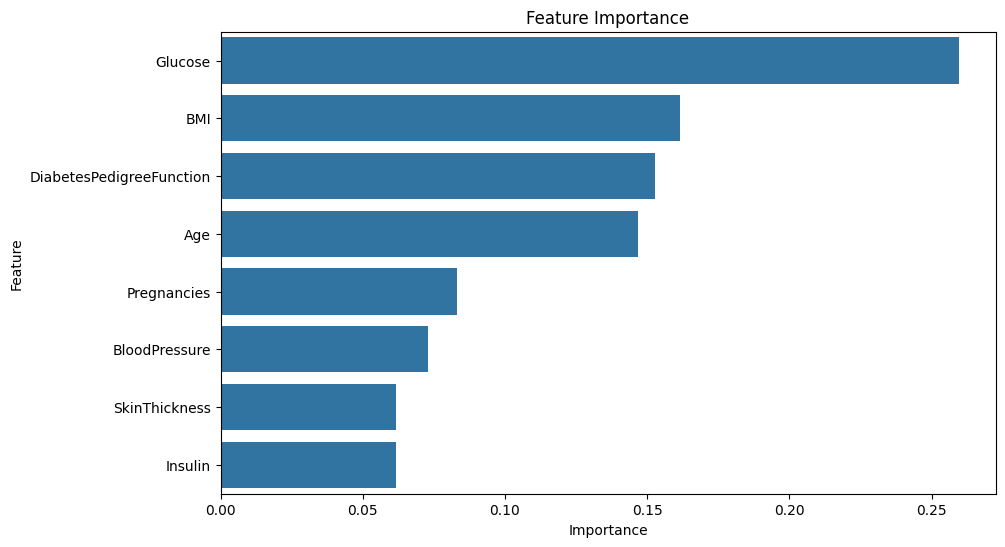

TypeError: only integer scalar arrays can be converted to a scalar index

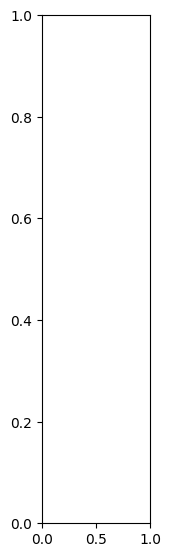

In [28]:
# Feature Importance
# Use feature importance tools to interpret which factors contribute most to diabetes prediction.
# Tree-based models (e.g., Random Forest, XGBoost) provide built-in feature importance.
# Use SHAP or LIME for model-agnostic explanations.

# Assuming you have a trained model (e.g., best_model from your previous code)
# and X_train is your training data DataFrame

# Feature Importance for Tree-based Models (e.g., Random Forest)
if isinstance(best_model, (RandomForestClassifier, XGBClassifier, DecisionTreeClassifier)):
  importances = best_model.feature_importances_
  feature_names = X_train.columns

  # Create a DataFrame for feature importances
  feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

  # Sort by importance in descending order
  feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

  # Plot feature importances
  plt.figure(figsize=(10, 6))
  sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
  plt.title('Feature Importance')
  plt.xlabel('Importance')
  plt.ylabel('Feature')
  plt.show()

# For other model types (e.g., Logistic Regression), you can use SHAP or LIME.

# SHAP (SHapley Additive exPlanations)
# Install SHAP
!pip install shap

import shap

# Assuming you have X_test and best_model
# Get the original (unscaled) data for X_test
# Assuming 'data' is your original DataFrame and you used a 80-20 split
X_train_original, X_test_original, y_train, y_test = train_test_split(data.drop('Outcome', axis=1), data['Outcome'], test_size=0.2, random_state=42, stratify=data['Outcome'])


explainer = shap.Explainer(best_model, X_train_original) # Use the original (unscaled) data for the explainer
shap_values = explainer(X_test_original)

# Summary plot
shap.summary_plot(shap_values, X_test_original, plot_type="bar")

# Dependence plot (example)
shap.dependence_plot("Glucose", shap_values.values, X_test_original)